In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import h5py

In [2]:
#load covariance matricies
with h5py.File('../data/Miller26_param_cov.h5', 'r',) as f:
    res_dict = {}
    res_dict['meta'] = {k:d for k,d in f.attrs.items()}
    for k in f.keys():
        res_dict[k] = dict(cov = f[k]['cov'][:], loc = f[k]['loc'][:])

#Define functions for each variable
def f_b(z, params):
    b0,b1,b2 = params
    if isinstance(b0, np.ndarray) and isinstance(z, np.ndarray):
        z = z[:,np.newaxis]
    return (b0 + np.exp(b1*z)) * (z**2 + b2 )

def f_m(z, params):
    m0,m1,m2 = params
    if isinstance(m0, np.ndarray) and isinstance(z, np.ndarray):
        z = z[:,np.newaxis]
    return (z**0.5*(m0*z*np.exp(-z) + m1) + m2)**0.5

def f_alpha(z, params):
    a0,a1 = params
    if isinstance(a0, np.ndarray) and isinstance(z, np.ndarray):
        z = z[:,np.newaxis]
    return a0 + a1*np.exp(-z)

def f_log_rp(z, params):
    lrp0,lrp1,lrp2 = params
    if isinstance(lrp0, np.ndarray)and isinstance(z, np.ndarray):
        z = z[:,np.newaxis]
    return z*(lrp0*np.exp(-z) + lrp1) + lrp2

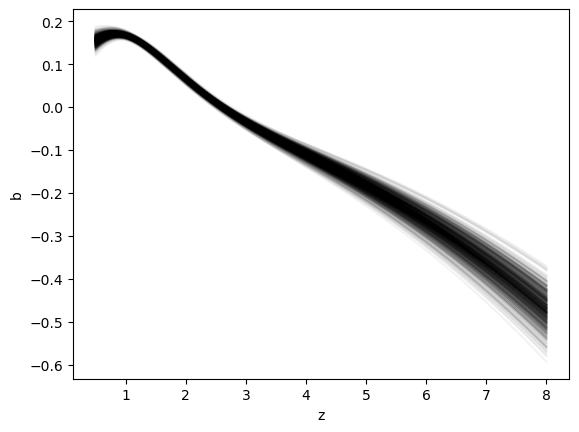

In [3]:
#Draw samples from the covariance matrix for the samples b0,b1,b2
b_param_samps = np.random.multivariate_normal(mean = res_dict['b']['loc'], cov = res_dict['b']['cov'],size = 500)
m_param_samps = np.random.multivariate_normal(mean = res_dict['m']['loc'], cov = res_dict['m']['cov'],size = 500)

#Plot redshift evolution for each sample
z_ax = np.linspace(0.5,8, num = 1000)
b_at_z = f_b(z_ax, b_param_samps.T)

plt.plot(z_ax, b_at_z, 'k-', alpha = 0.05)
plt.xlabel('z')
plt.ylabel('b')
plt.show()

Text(0.5, 0, 'b at z=2')

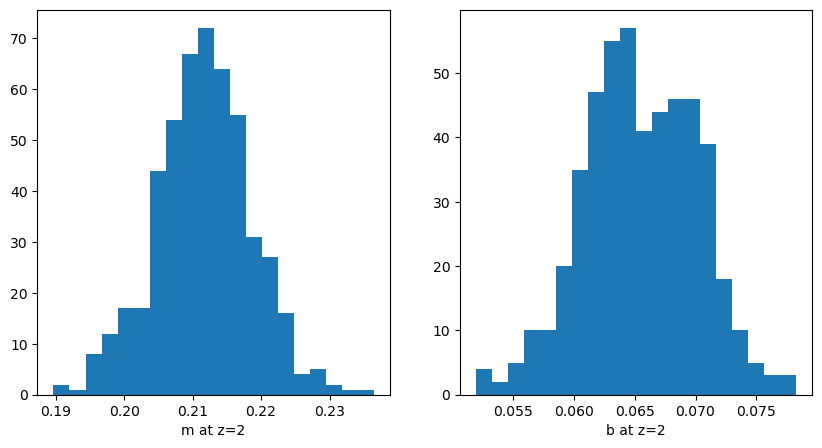

In [4]:
#Calculate values of each parameter at z=2
m_at_2 = f_m(2., m_param_samps.T)
b_at_2 = f_b(2., b_param_samps.T)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.hist(m_at_2, bins = 20)
ax1.set_xlabel('m at z=2')
ax2.hist(b_at_2, bins = 20)
ax2.set_xlabel('b at z=2')